In [71]:
pip install pmdarima

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
df = pd.read_csv('NSEI 2015-2023.csv',index_col='Date',parse_dates=True)


In [74]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195,101900
2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,118200
2015-01-06,8325.299805,8327.849609,8111.350098,8127.350098,172800
2015-01-07,8118.649902,8151.200195,8065.450195,8102.100098,164100
2015-01-08,8191.399902,8243.500000,8167.299805,8234.599609,143800


In [75]:
df.shape

(2213, 5)

In [76]:
df.describe()

,Open,High,Low,Close,Volume
count,2213.000000,2213.000000,2213.000000,2213.000000,2.213000e+03
mean,12405.978426,12463.024263,12326.337898,12396.524227,3.232975e+05
std,3861.464460,3873.947399,3844.778100,3861.815745,2.020718e+05
min,7023.649902,7034.200195,6825.799805,6970.600098,0.000000e+00
25%,9026.750000,9099.049805,8912.400391,8981.450195,1.892000e+05
50%,11079.799805,11141.750000,11010.950195,11075.900391,2.561000e+05
75%,16270.049805,16338.750000,16172.599609,16258.250000,3.968000e+05
max,21737.650391,21801.449219,21678.000000,21778.699219,1.811000e+06


# Data Visualization

<Axes: xlabel='Date'>

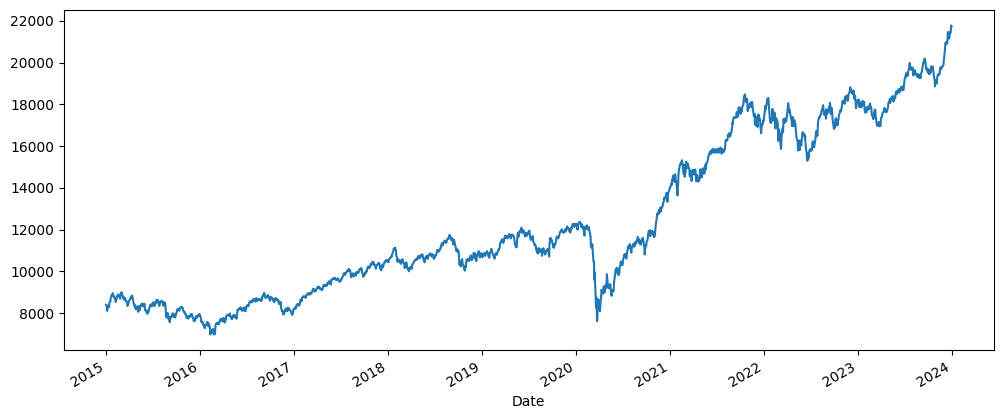

In [77]:
df['Close'].plot(figsize=(12,5))

Data is Non-Stationary.

In [78]:
df['Close_new']=df['Close'] - df['Close'].shift(1)

In [79]:
df.dropna(axis=0,inplace=True)
df

,Open,High,Low,Close,Volume,Close_new
Date,,,,,,
2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,118200,-17.049804
2015-01-06,8325.299805,8327.849609,8111.350098,8127.350098,172800,-251.050293
2015-01-07,8118.649902,8151.200195,8065.450195,8102.100098,164100,-25.250000
2015-01-08,8191.399902,8243.500000,8167.299805,8234.599609,143800,132.499511
2015-01-09,8285.450195,8303.299805,8190.799805,8284.500000,148000,49.900391
...,...,...,...,...,...,...
2023-12-22,21295.849609,21390.500000,21232.449219,21349.400391,284700,94.349610
2023-12-26,21365.199219,21477.150391,21329.449219,21441.349609,219500,91.949218
2023-12-27,21497.650391,21675.750000,21495.800781,21654.750000,256500,213.400391


<Axes: xlabel='Date'>

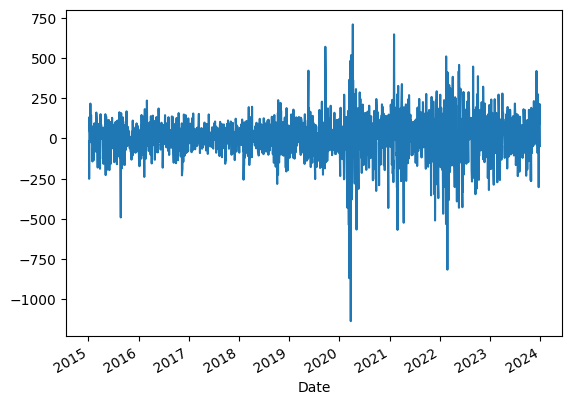

In [80]:
df['Close_new'].plot()

In [81]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset,autolag = 'AIC')
    print("1.ADF:",dftest[0])
    print("2.P-value:",dftest[1])
    print("3.Num of Lags",dftest[2])
    print("4.Num of Observations Used for ADF Regression and Critical Values Calculation",dftest[3])
    print("5.Critical Values:")
    for key, val in dftest[4].items():
        print("\t",key,":",val)

In [82]:
ad_test(df['Close_new'])

1.ADF: -16.902674751549586
2.P-value: 1.0248496067546175e-29
3.Num of Lags 6
4.Num of Observations Used for ADF Regression and Critical Values Calculation 2205
5.Critical Values:
	 1% : -3.4333191288144413
	 5% : -2.8628516682161713
	 10% : -2.567468264817643


In [83]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [84]:
stepwise_fit = auto_arima(df['Close_new'], trace=True,suppress_warnings= True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=27657.329, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=27658.116, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=27658.124, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=27660.433, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=27660.120, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.480 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2212
Model:                        SARIMAX   Log Likelihood              -13826.665
Date:                Sat, 11 May 2024   AIC                          27657.329
Time:                        15:56:19   BIC                          27668.733
Sample:                             0   HQIC                         27661.495
                               - 2212                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.0289      2.760      2.185      0.029       0.620      11.437
sigma2      1.573e+04    219.642     71.638      0.000    1.53e+04    1.62e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.21   Jarque-Bera (JB):              6044.20
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               4.52   Skew:                            -0.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
from statsmodels.tsa.arima.model import ARIMA

In [86]:
#Split data into training and testing
print(df.shape)
train=df.iloc[:-400]
test=df.iloc[-400:]
print(train.shape,test.shape)

(2212, 6)
(1812, 6) (400, 6)


In [87]:
#training the model
model =ARIMA(train['Close_new'],order=(0,0,0))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Close_new   No. Observations:                 1812
Model:                          ARIMA   Log Likelihood              -11304.558
Date:                Sat, 11 May 2024   AIC                          22613.117
Time:                        15:56:19   BIC                          22624.121
Sample:                             0   HQIC                         22617.177
                               - 1812                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0915      3.047      1.343      0.179      -1.880      10.063
sigma2      1.537e+04    219.103     70.168      0.000    1.49e+04    1.58e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):              7709.21
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               5.79   Skew:                            -1.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
start = len(train)
end = len(train)+ len(test)-1
pred=model.predict(start=start,end=end,type='levels')
print(pred)
pred.index=df.index[start:end+1]
print(pred)

1812    4.09149
1813    4.09149
1814    4.09149
1815    4.09149
1816    4.09149
         ...   
2207    4.09149
2208    4.09149
2209    4.09149
2210    4.09149
2211    4.09149
Name: predicted_mean, Length: 400, dtype: float64
Date
2022-05-20    4.09149
2022-05-23    4.09149
2022-05-24    4.09149
2022-05-25    4.09149
2022-05-26    4.09149
               ...   
2023-12-22    4.09149
2023-12-26    4.09149
2023-12-27    4.09149
2023-12-28    4.09149
2023-12-29    4.09149
Name: predicted_mean, Length: 400, dtype: float64


<Axes: xlabel='Date'>

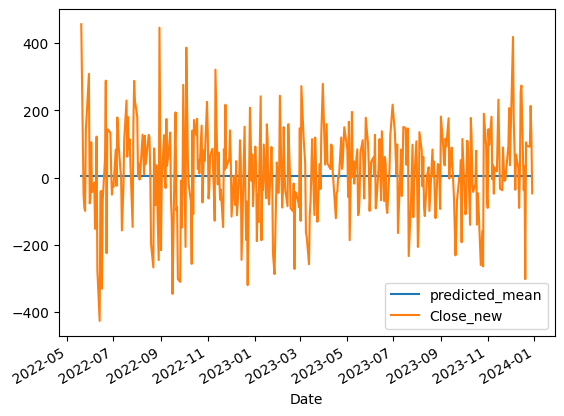

In [89]:
pred.plot(legend=True)
test['Close_new'].plot(legend=True)

In [90]:
test['Close_new'].mean()

14.805

In [91]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmsqr = sqrt(mean_squared_error(pred,test['Close_new']))
print(rmsqr)

132.1006775986103


In [92]:
model2 =ARIMA(df['Close_new'],order=(0,0,0))
model2=model2.fit()
df.tail()


,Open,High,Low,Close,Volume,Close_new
Date,,,,,,
2023-12-22,21295.849609,21390.500000,21232.449219,21349.400391,284700,94.349610
2023-12-26,21365.199219,21477.150391,21329.449219,21441.349609,219500,91.949218
2023-12-27,21497.650391,21675.750000,21495.800781,21654.750000,256500,213.400391
2023-12-28,21715.000000,21801.449219,21678.000000,21778.699219,393100,123.949219
2023-12-29,21737.650391,21770.300781,21676.900391,21731.400391,270900,-47.298828


In [93]:
index_future_dates = pd.date_range(start='2015-01-05',end='2023-12-29')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+10,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
print(comp_pred)

ValueError: Length mismatch: Expected axis has 11 elements, new values have 3281 elements